# Import library dan dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

df = pd.read_csv('../input/titanic/train.csv')

# Menampilkan 5 data pertama

In [2]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data shape, data types, dan NaN values

In [3]:
df.shape

(891, 12)

In [4]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
# Jumlah data yang kosong di tiap kolom
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Tampilkan data dimana Age nya NaN (ini kebetulan Cabin nya juga NaN semua)

In [4]:
df[df['Age'].isna()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


# Jumlah data not survived dan survived (0 dan 1)

In [5]:
survived_count = df['Survived'].value_counts()
survived_count

0    549
1    342
Name: Survived, dtype: int64

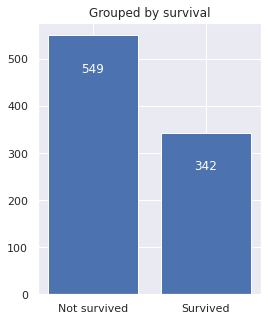

In [8]:
plt.figure(figsize=(4,5))
plt.bar(survived_count.index, survived_count.values)
plt.title('Grouped by survival')
plt.xticks([0,1],['Not survived', 'Survived'])

# Menampilkan tulisan
for i, value in enumerate(survived_count.values):
    plt.text(i, value-70, str(value), fontsize=12, color='white',
             horizontalalignment='center', verticalalignment='center')
plt.show()

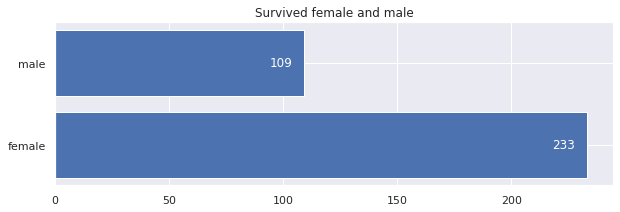

In [9]:
# Ambil data angkanya dulu
survived_sex = df[df['Survived']==1]['Sex'].value_counts()

plt.figure(figsize=(10,3))
plt.barh(survived_sex.index, survived_sex.values)
plt.title('Survived female and male')

# Menampilkan tulisan
for i, value in enumerate(survived_sex.values):
    plt.text(value-10, i, str(value), fontsize=12, color='white',
             horizontalalignment='center', verticalalignment='center')
plt.show()

# Distribusi Pclass, Gender, dan Embarkation

In [10]:
pclass_count = df['Pclass'].value_counts()
pclass_count

3    491
1    216
2    184
Name: Pclass, dtype: int64

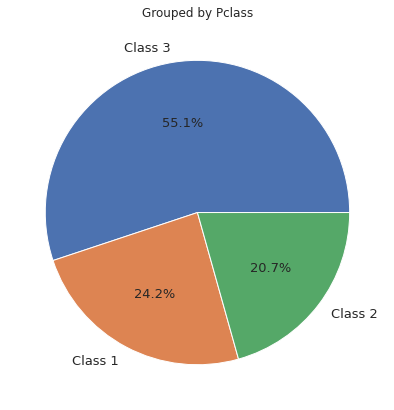

In [11]:
plt.figure(figsize=(7,7))
plt.title('Grouped by Pclass')
plt.pie(pclass_count.values, 
        labels=['Class {}'.format(i) for i in pclass_count.index], 
        autopct='%1.1f%%', textprops={'fontsize':13})
plt.show()

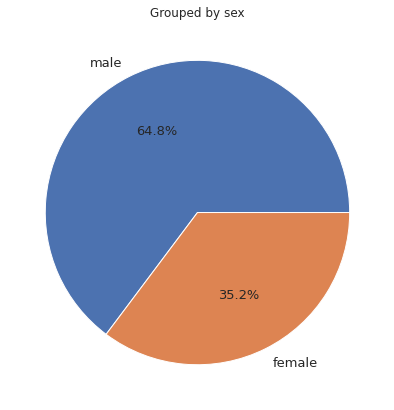

In [12]:
sex_count = df['Sex'].value_counts()

plt.figure(figsize=(7,7))
plt.title('Grouped by sex')
plt.pie(sex_count.values, labels=sex_count.index, 
        autopct='%1.1f%%', textprops={'fontsize':13})
plt.show()

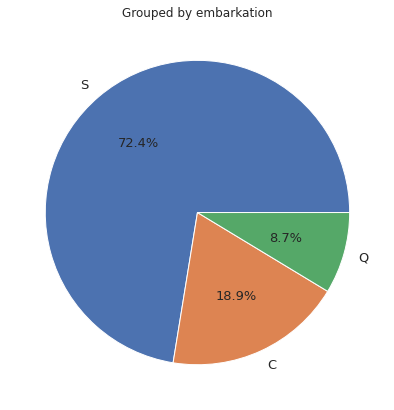

In [13]:
embarked_count = df['Embarked'].value_counts()

plt.figure(figsize=(7,7))
plt.title('Grouped by embarkation')
plt.pie(embarked_count.values, 
        labels=embarked_count.index, 
        autopct='%1.1f%%', textprops={'fontsize':13})
plt.show()

# Distribusi usia

In [14]:
# Ambil data age yang bukan NaN
ages = df[df['Age'].notnull()]['Age'].values

# Buat data untuk histogram
ages_hist = np.histogram(ages, bins=[0,10,20,30,40,50,60,70,80,90])
ages_hist

(array([ 62, 102, 220, 167,  89,  48,  19,   6,   1]),
 array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90]))

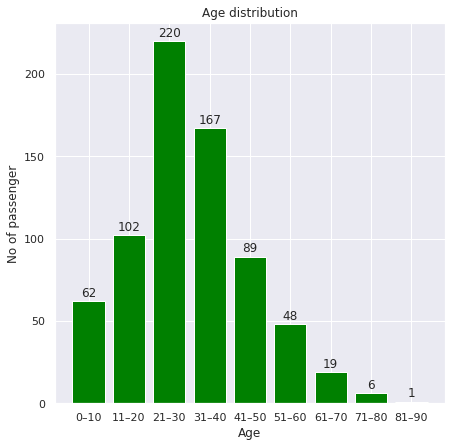

In [15]:
# Buat labelnya secara manual
ages_hist_labels = ['0–10', '11–20', '21–30', 
                    '31–40', '41–50', '51–60', 
                    '61–70', '71–80', '81–90']

plt.figure(figsize=(7,7))
plt.title('Age distribution')
plt.bar(ages_hist_labels, ages_hist[0], color='Green')
plt.xlabel('Age')
plt.ylabel('No of passenger')
for i, bin in zip(ages_hist[0], range(9)):
    plt.text(bin, i+5, str(int(i)), fontsize=12,
             horizontalalignment='center', verticalalignment='center')
plt.show()

# Distribusi Cabin

In [16]:
df['Cabin'].unique()[:10]

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78'], dtype=object)

In [17]:
print("Sebelum dibersihkan:", df['Cabin'].shape)
cabins = df['Cabin'].dropna()

print("Setelah dibersihkan:", cabins.shape)

Sebelum dibersihkan: (891,)
Setelah dibersihkan: (204,)


In [18]:
def take_initial(x):
    return x[0]

cabins = cabins.apply(take_initial)
cabins[:10]

1     C
3     C
6     E
10    G
11    C
21    D
23    A
27    C
31    B
52    D
Name: Cabin, dtype: object

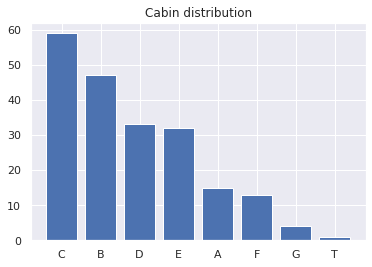

In [19]:
# Hitung unique value di cabins
cabins_count = cabins.value_counts()

# Buat graph nya seperti biasa
plt.title('Cabin distribution')
plt.bar(cabins_count.index, cabins_count.values)
plt.show()

# Distribusi harga tiket

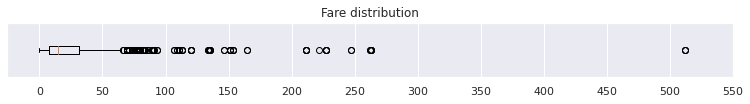

In [29]:
plt.figure(figsize=(13,1))
plt.title('Fare distribution')
plt.boxplot(df['Fare'], vert=False)
plt.yticks([])
plt.xticks(range(0,600,50))
plt.show()

In [36]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64